Kullanabileceiğimiz kütüphanelerin hepsi importlanmıştır.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split



from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

csv dosyalarını okumamız için Google drive ile google collaborator bağlantısı yapılmıştır.

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


a part of training and testing set dosyasındaki testing-set ve features csv okundu

In [4]:
testdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UNSWNB15DATASETS/a part of training and testing set/UNSW_NB15_testing-set.csv")
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UNSWNB15DATASETS/NUSW-NB15_features.csv', encoding='ISO-8859-1')

In [5]:
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


Yaygın olmayan servislerin kaldırıldığı senaryo için bırakılmıştır.

In [ ]:
# testdata[testdata['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


Saldırıların adetlerine bakılmıştır.

In [6]:
testdata['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

Veri setinde herhangi bir hata var mı diye kontrol edilmiştir.

In [7]:
testdata.query('label==1')['attack_cat'].value_counts()

Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [ ]:
# testdata['service'].replace('-',np.nan,inplace=True)

Okudugumuz csv de herhangi bir null değer varmı diye kontrol ettik. Ardından id sütunu sonucu etkileyeceği için dropladık.

In [8]:
testdata.isnull().sum()
testdata = testdata.drop(columns=['id'],axis=1)

Veri setimizin bilgilerini kontrol ettik(1. senaryo için gerekli kodlar yorum satırında bırakılmıştır)

In [9]:
# testdata.dropna(inplace=True)
testdata.shape

(175341, 44)

Bazı önemli bilgilerin yüzdesel dağılımı gösterilmiştir.

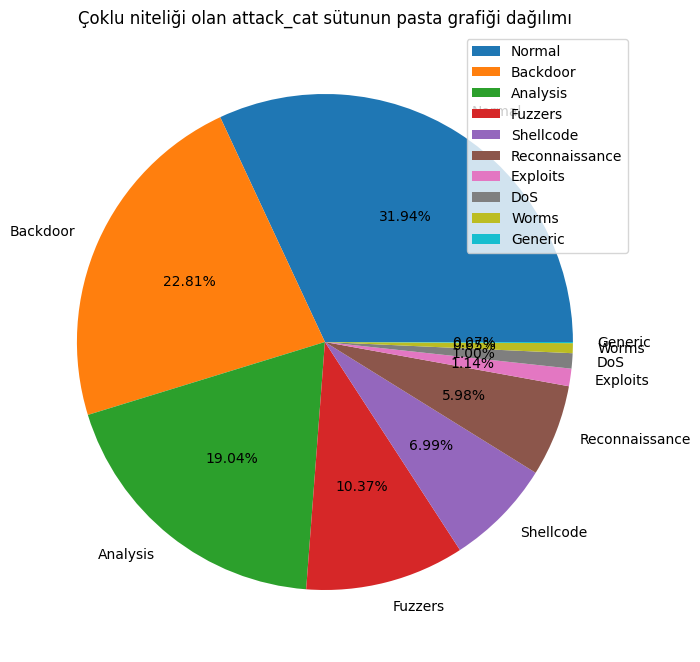

In [10]:
plt.figure(figsize=(8,9))
plt.pie(testdata.attack_cat.value_counts(),labels=testdata.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Çoklu niteliği olan attack_cat sütunun pasta grafiği dağılımı')
plt.legend(loc='best')
plt.show()

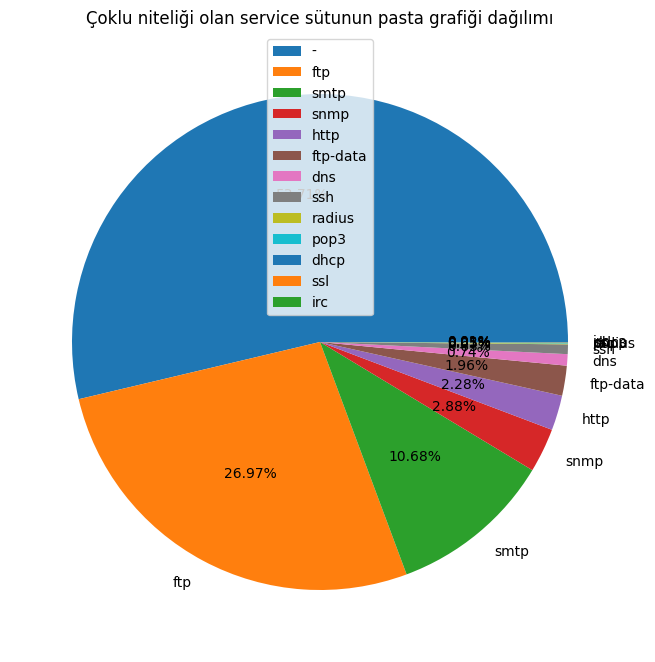

In [11]:
plt.figure(figsize=(8,9))
plt.pie(testdata.service.value_counts(),labels=testdata.service.unique(),autopct='%0.2f%%')
plt.title('Çoklu niteliği olan service sütunun pasta grafiği dağılımı')
plt.legend(loc='best')
plt.show()

Attack category value sayılarını kontrol ettik

In [12]:
testdata['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

Ardından state sütunun value sayılarını kontrol ettik

In [13]:
testdata['service'].value_counts()

-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

In [14]:
testdata

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


Features tan cektiğimiz type isimlerini str lower yaptık çünkü Büyük harfle başlaması isim olarak farklılık oluşturabilir.

In [15]:
features['Type '] = features['Type '].str.lower()

Ardından features csv den okuduğumuz verilerden sütunların type larını çektik ve farklılıkları düzeltmek için hepsini aynı isim yaptık.

In [16]:
nominals = features['Name'][features['Type ']=='nominal']
integers= features['Name'][features['Type ']=='integer']
binaries = features['Name'][features['Type ']=='binary']
floats = features['Name'][features['Type ']=='float']
print(nominals)
print(integers)
print(binaries)
print(floats)

0          srcip
2          dstip
4          proto
5          state
13       service
47    attack_cat
Name: Name, dtype: object
1                sport
3               dsport
7               sbytes
8               dbytes
9                 sttl
10                dttl
11               sloss
12               dloss
16               Spkts
17               Dpkts
18                swin
19                dwin
20               stcpb
21               dtcpb
22             smeansz
23             dmeansz
24         trans_depth
25         res_bdy_len
36        ct_state_ttl
37    ct_flw_http_mthd
39          ct_ftp_cmd
40          ct_srv_src
41          ct_srv_dst
42          ct_dst_ltm
43         ct_src_ ltm
44    ct_src_dport_ltm
45    ct_dst_sport_ltm
46      ct_dst_src_ltm
Name: Name, dtype: object
35    is_sm_ips_ports
38       is_ftp_login
48              Label
Name: Name, dtype: object
6         dur
14      Sload
15      Dload
26       Sjit
27       Djit
30    Sintpkt
31    Dintpkt
32     tcprt

Ardından okudugumuz csv nin sütunlarını çektik ve featurestan cektiğimiz sütunları doğru bi şekilde okuduğumuz csv ye aktardık.(Sebebi ise bazı columnlar yanlış yazılmış veya büyük harfle yada kücük harfel başlamışsa farklılık olmaması için yapılmıştır). En sonda ise hepsi numeric yapılmıştır.

In [17]:
columns = testdata.columns
integers = columns.intersection(integers)
binaries = columns.intersection(binaries)
floats = columns.intersection(floats)
print(type(integers))
integers

<class 'pandas.core.indexes.base.Index'>


Index(['sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'swin', 'stcpb',
       'dtcpb', 'dwin', 'trans_depth', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_srv_dst'],
      dtype='object')

In [18]:
for i in integers:
  pd.to_numeric(testdata[i])

In [19]:
for i in binaries:
  pd.to_numeric(testdata[i]) 

In [20]:
for i in floats:
  pd.to_numeric(testdata[i])

Numeric olan tüm sütunları okuduk ve columns.difference diyerek categorical olan sütunlara ulaştık

In [21]:
numeric_cols = testdata.select_dtypes(include='number').columns
categorical_cols = testdata.columns.difference(numeric_cols)

categorical_cols = categorical_cols[1:]
categorical_cols    

Index(['proto', 'service', 'state'], dtype='object')

Ardından kategorik olan sütunların verilerini kopyaladık

In [22]:
categorical_data = testdata[categorical_cols].copy()
categorical_data.head()    

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN


Ardından algoritmaların calışması için one-hot encode uyguladık ve bu sayede kategorik olan sütunlar 0-1 lerden oluşmaktadır.

In [23]:
categorical_data = pd.get_dummies(categorical_data,columns=categorical_cols)

In [24]:
categorical_data.head()

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
testdata.shape

(175341, 44)

Ardından okuduğumuz veriye one hot encode uyguladıgımız verileri ekledik

In [26]:
testdata = pd.concat([testdata, categorical_data],axis=1)


In [27]:
testdata.shape


(175341, 199)

One-hot encoding uyguladığımız verilerin ilk halini dataframe'den kaldırdık

In [28]:
testdata.drop(columns=categorical_cols,inplace=True)


In [29]:
testdata.shape


(175341, 196)

Ardından numeric olan tüm sütunları okuduk.(Label sütunu zaten binary tipinde olduğu için numericcols'dan kaldırdık)

In [30]:
numericcols = list(testdata.select_dtypes(include='number').columns)
numericcols.remove('label')
print(numericcols)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp', 'proto_ib', 'proto_i

Numeric olan bazı sütunlarda çok uçuk değerler olduğu için(yani algoritmanın accuracy'sini yüksek düzeyde etkileme ihtimali bulunduğu için) 0-1 arasında değer alıcak şekilde MinMaxScaler fonksiyonunu yazdık(Örneğin bazı sütunlar 0-256 arasında değerler almaktadır. Yani binary system)

In [31]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(dataframe,columns):
  for i in columns:
    arr = dataframe[i]
    arr = np.array(arr)
    dataframe[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return dataframe
     

In [32]:
testdata


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,1,0,0,0,0,0
175337,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,...,0,0,0,1,0,0,0,0,0,0
175338,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,1,0,0,0,0,0
175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,1,0,0,0,0,0


MinMaxScaler fonksiyonunun amacı ise data normalization'dır. Normalization sayesinde uçuk değerlerin algoritmaya etkisi azalmaktadır ve düzenlenmektedir.

In [33]:
testdata = normalization(testdata.copy(),numericcols)


Okuduğumuz csvnin dataframeini kopyaladık. Ardından multilabel değişkenine sadece attack_cat sütununu verdik.

In [34]:
multiclass_data = testdata.copy()
multiclass_label = pd.DataFrame(multiclass_data.attack_cat)
multiclass_label  

,attack_cat
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
175336,Generic
175337,Shellcode
175338,Generic
175339,Generic


One-hot encoding yerine attack_cat sütununa Label Encoding uyguladık. Çünkü algoritmaları araştırdığımızda isabet oranı sütun sayısı az olunca daha gerçekçi olmaktadır. Ayrıca train verisetinde hedef sütunu sadece bir sütun olacağı için bu sütun label sütunu olurdu. Algoritma ise attack_cat sütunu one-hot encoding yapılmış hali sayesinde trainini başarılı bir şekilde yapar ve isabet oranı gerçekdışı bir oran olurdu.

In [35]:
le = preprocessing.LabelEncoder()
encoded_label = multiclass_label.apply(le.fit_transform)
encoded_label

,attack_cat
0,6
1,6
2,6
3,6
4,6
...,...
175336,5
175337,8
175338,5
175339,5


İlerde sonuçları bastırırken rahatlık olması için saldırı türlerinin bulunduğu arrayler oluşturduk.

In [36]:
report_arr = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance','Shellcode', 'Worms']
report_arr2=     ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms']   

Ardından label encoding uyguladığımız sütunu ana dataframe imize aktardık ve değiştirdik.

In [37]:
testdata['attack_cat'] = encoded_label

değiştirdiğimiz sütunu kontrol ettik.

In [38]:
testdata['attack_cat']

0         6
1         6
2         6
3         6
4         6
         ..
175336    5
175337    8
175338    5
175339    5
175340    5
Name: attack_cat, Length: 175341, dtype: int64

In [39]:
testdata['label']

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

Label ve attack_cat sütununu dropladık çünkü sadece birini dropladığımızda diğer sütun sayesinde algoritma training yaptığında çok iyi bi şekilde öğrenmektedir ve isabet oranı gerçekdışı bir oranda olmaktadır. Bu yüzden ikisinde dropladık. Ardında target sütun olarak ise attack_cat sütununu seçtik. Çünkü label sütunun seçtiğimizde saldırı veya değilmi opsiyonunu uygulamak daha kolay ve bu sayede algoritma daha iyi bir sonuc elde etmektedir. Fakat attack_cat sütunun seçtiğimizde algoritma spesifik olarak hangi attack'ı daha iyi yakalayıp yakalayamadığını anlayabiliriz. Bu sayede hangi algoritma hangi saldırıyı yakalamada daha iyi olduğunu görebiliriz.

In [42]:
X = testdata.drop(columns=['label'],axis=1)
X = testdata.drop(columns=['attack_cat'],axis=1)


Y = testdata['attack_cat']
X

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,2.024634e-03,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.083170e-02,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.705215e-02,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.802737e-02,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.490901e-03,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,1.500000e-07,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,0.000000,8.461366e-03,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
175337,8.429368e-03,0.000936,0.000729,0.000046,0.000024,0.000034,0.996078,0.992126,1.473996e-06,0.000219,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
175338,1.500000e-07,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,0.000000,8.461366e-03,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
175339,1.500000e-07,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,0.000000,8.461366e-03,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Train size ı 0.8 belirledik çünkü ne kadar fazla train verisi olursa o kadar iyi sonuç elde etmektedir.

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)
X_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
98646,8.333335e-08,0.000104,0.000000,0.000013,0.000000,2.000000e-01,0.996078,0.000000,2.591850e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
69384,4.782251e-03,0.001144,0.000911,0.000094,0.000266,7.318731e-05,0.243137,0.992126,5.312639e-06,0.004369,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
105617,1.500000e-07,0.000104,0.000000,0.000013,0.000000,1.111111e-01,0.996078,0.000000,1.484450e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100985,2.958817e-03,0.000520,0.000182,0.000074,0.000006,3.943018e-05,0.243137,0.992126,6.186010e-06,0.000086,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159906,1.666667e-08,0.000104,0.000000,0.000007,0.000000,1.000000e+00,0.996078,0.000000,7.615230e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123012,1.500000e-07,0.000104,0.000000,0.000013,0.000000,1.111111e-01,0.996078,0.000000,1.484450e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
59358,1.500000e-07,0.000104,0.000000,0.000013,0.000000,1.111111e-01,0.996078,0.000000,1.484450e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
153709,5.000001e-08,0.000104,0.000000,0.000007,0.000000,3.333333e-01,0.996078,0.000000,2.538410e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
103904,9.763983e-01,0.001352,0.000000,0.000114,0.000000,2.219040e-07,0.996078,0.000000,3.201821e-08,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
y_test

85117    6
82473    6
84417    3
7760     6
1517     6
        ..
77264    3
52317    4
41979    6
96464    7
47446    6
Name: attack_cat, Length: 35069, dtype: int64

In [45]:
LR = LogisticRegression(random_state=123, max_iter=5000)
LR

LogisticRegression(max_iter=5000, random_state=123)

In [46]:
LR.fit(X_train,y_train)


LogisticRegression(max_iter=5000, random_state=123)

In [ ]:
predictionofLR = LR.predict(X_test)


In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, predictionofLR))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, predictionofLR))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, predictionofLR)))
print("R2 Score - " , metrics.explained_variance_score(y_test, predictionofLR)*100)
print("Accuracy - ",accuracy_score(y_test,predictionofLR)*100)

Mean Absolute Error -  0.32413242464855
Mean Squared Error -  0.884684479169637
Root Mean Squared Error -  0.9405766737324698
R2 Score -  64.17876229719417
Accuracy -  83.26157004762041


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=predictionofLR, target_names=report_arr)

print(cls_report)

                precision    recall  f1-score   support

      Analysis       0.97      0.09      0.16       413
      Backdoor       1.00      0.00      0.01       334
           DoS       0.33      0.06      0.10      2432
      Exploits       0.60      0.89      0.72      6843
       Fuzzers       0.75      0.81      0.78      3653
       Generic       0.99      0.98      0.99      7940
        Normal       1.00      1.00      1.00     11068
Reconnaissance       0.66      0.54      0.59      2131
     Shellcode       0.00      0.00      0.00       237
         Worms       0.00      0.00      0.00        18

      accuracy                           0.83     35069
     macro avg       0.63      0.44      0.43     35069
  weighted avg       0.82      0.83      0.81     35069



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


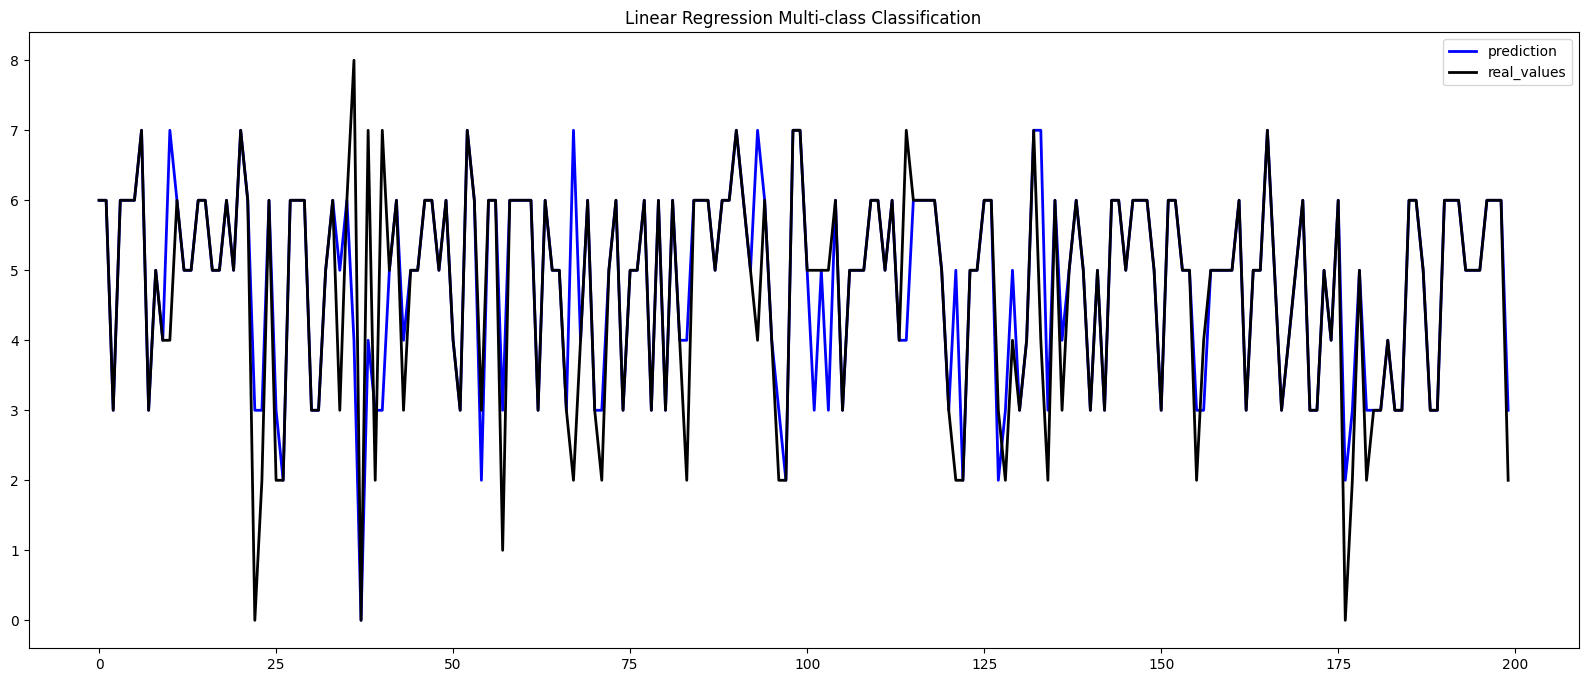

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(predictionofLR[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='black')
plt.legend(loc="best")
plt.title("Linear Regression Multi-class Classification")
plt.show()

In [ ]:

KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
predictionofKNN = KNN.predict(X_test)

In [ ]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, predictionofKNN))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, predictionofKNN))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, predictionofKNN)))
print("R2 Score - " , metrics.explained_variance_score(y_test, predictionofKNN)*100)
print("Accuracy - ",accuracy_score(y_test,predictionofKNN)*100)

Mean Absolute Error -  0.3301776497761556
Mean Squared Error -  0.9234081382417519
Root Mean Squared Error -  0.9609412772077969
R2 Score -  62.673332361256584
Accuracy -  82.65989905614646


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=predictionofKNN, target_names=report_arr)
print(cls_report)

                precision    recall  f1-score   support

      Analysis       0.36      0.16      0.22       413
      Backdoor       0.14      0.04      0.06       334
           DoS       0.31      0.36      0.33      2432
      Exploits       0.65      0.71      0.68      6843
       Fuzzers       0.81      0.82      0.82      3653
       Generic       1.00      0.98      0.99      7940
        Normal       1.00      1.00      1.00     11068
Reconnaissance       0.70      0.60      0.65      2131
     Shellcode       0.66      0.21      0.32       237
         Worms       0.25      0.11      0.15        18

      accuracy                           0.83     35069
     macro avg       0.59      0.50      0.52     35069
  weighted avg       0.83      0.83      0.82     35069



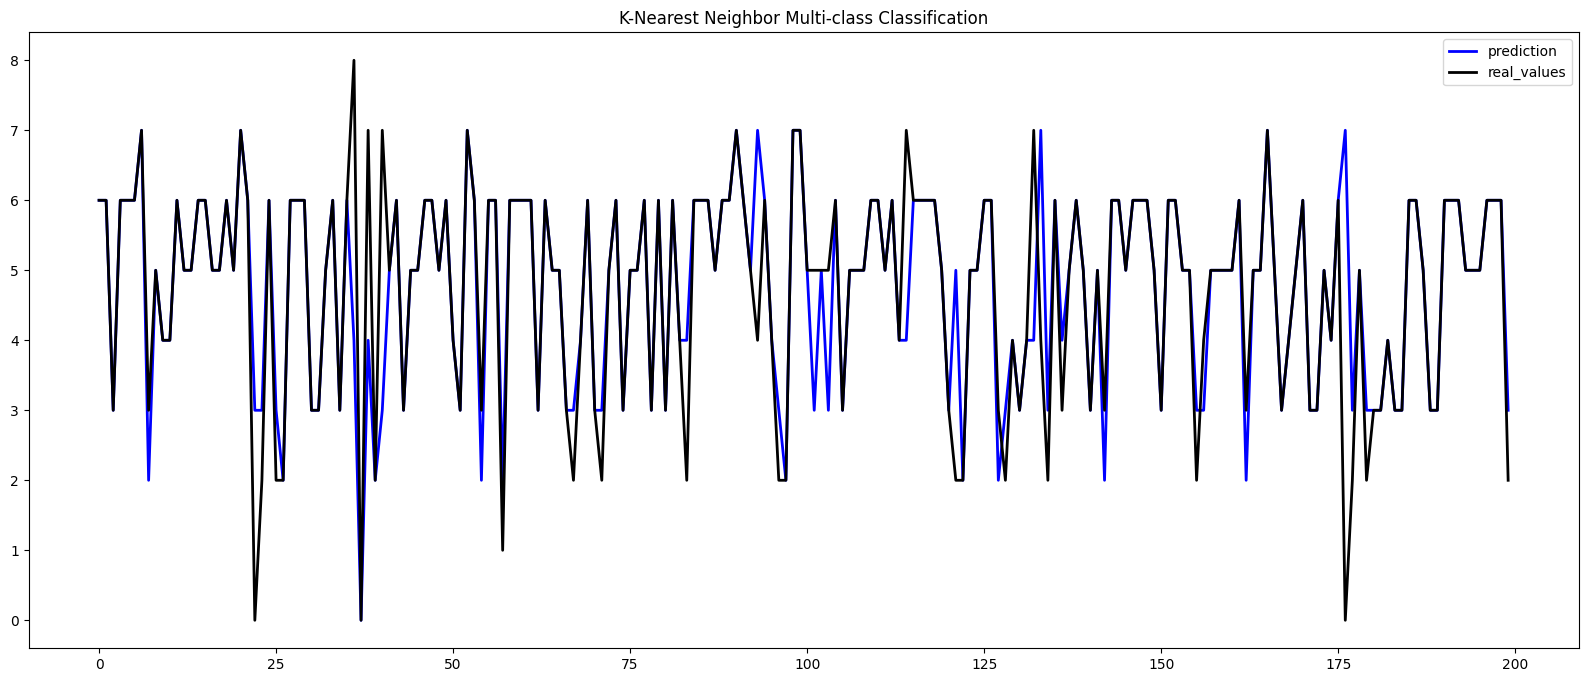

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(predictionofKNN[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='black')
plt.legend(loc="best")
plt.title("K-Nearest Neighbor Multi-class Classification")
plt.show()

In [ ]:
SVM = LinearSVC(random_state=42,max_iter=5000) 
SVM.fit(X_train,y_train)

LinearSVC(max_iter=5000, random_state=42)

In [ ]:
predictionofSVM = SVM.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, predictionofSVM))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, predictionofSVM))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, predictionofSVM)))
print("R2 Score - " , metrics.explained_variance_score(y_test, predictionofSVM)*100)
print("Accuracy - ",accuracy_score(y_test,predictionofSVM)*100)

Mean Absolute Error -  0.34004391342781376
Mean Squared Error -  0.9194730388662351
Root Mean Squared Error -  0.9588915678356105
R2 Score -  62.74069846192615
Accuracy -  82.5030653853831


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=predictionofSVM,target_names=report_arr)
print(cls_report)

                precision    recall  f1-score   support

      Analysis       0.95      0.10      0.18       413
      Backdoor       0.67      0.01      0.01       334
           DoS       0.33      0.06      0.10      2432
      Exploits       0.60      0.88      0.71      6843
       Fuzzers       0.70      0.80      0.74      3653
       Generic       0.99      0.98      0.98      7940
        Normal       1.00      1.00      1.00     11068
Reconnaissance       0.66      0.45      0.53      2131
     Shellcode       0.00      0.00      0.00       237
         Worms       0.00      0.00      0.00        18

      accuracy                           0.83     35069
     macro avg       0.59      0.43      0.43     35069
  weighted avg       0.81      0.83      0.80     35069



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


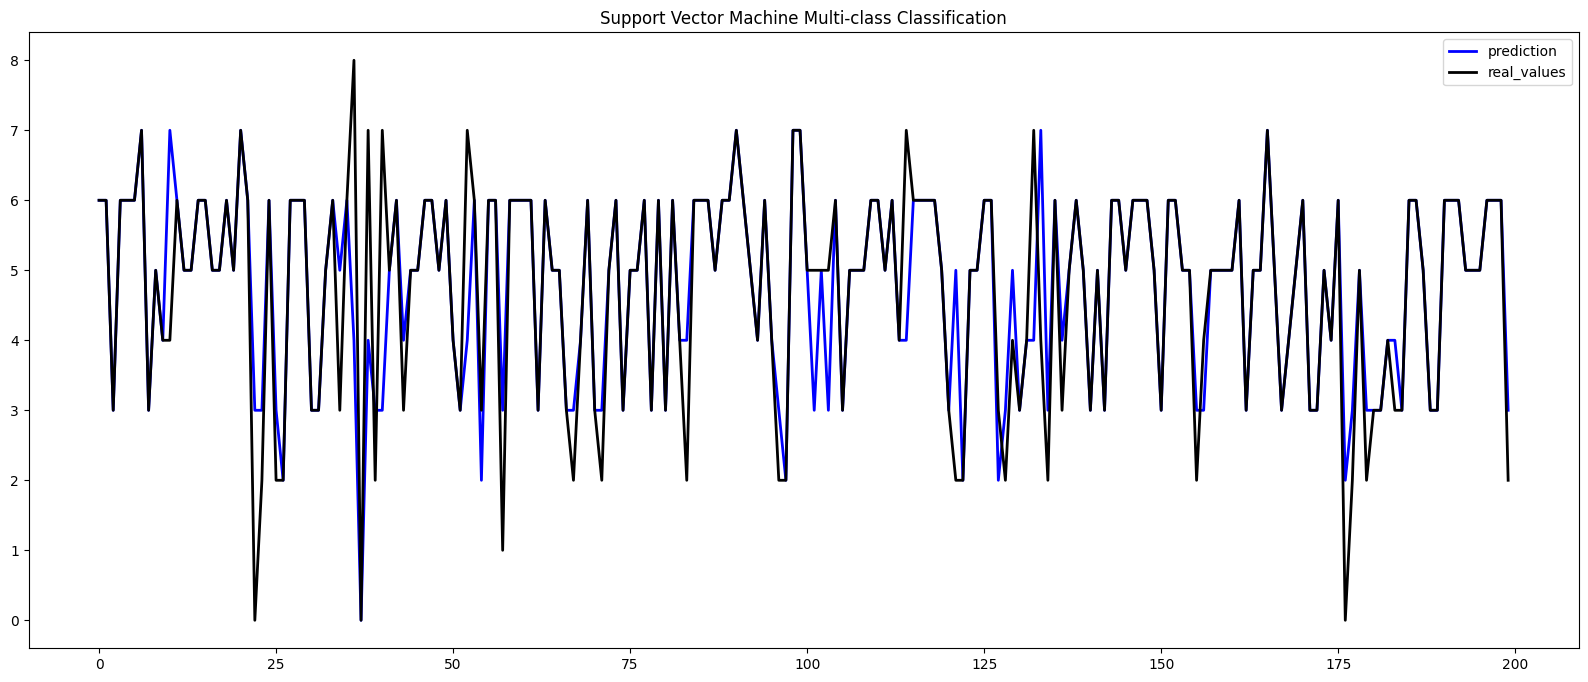

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(predictionofSVM[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='black')
plt.legend(loc="best")
plt.title("Support Vector Machine Multi-class Classification")
plt.show()

In [ ]:
RF = RandomForestClassifier(random_state=123)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [ ]:
predictionofRF = RF.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, predictionofRF))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, predictionofRF))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, predictionofRF)))
print("R2 Score - " , metrics.explained_variance_score(y_test, predictionofRF)*100)
print("Accuracy - ",accuracy_score(y_test,predictionofRF)*100)

Mean Absolute Error -  0.24397616128204397
Mean Squared Error -  0.6604123299780433
Root Mean Squared Error -  0.8126575723993738
R2 Score -  73.23823080952529
Accuracy -  86.36687672873478


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=predictionofRF,target_names=report_arr)
print(cls_report)

                precision    recall  f1-score   support

      Analysis       0.74      0.23      0.35       413
      Backdoor       0.71      0.12      0.21       334
           DoS       0.28      0.17      0.21      2432
      Exploits       0.64      0.86      0.74      6843
       Fuzzers       0.94      0.90      0.92      3653
       Generic       1.00      0.98      0.99      7940
        Normal       1.00      1.00      1.00     11068
Reconnaissance       0.92      0.75      0.82      2131
     Shellcode       0.76      0.57      0.65       237
         Worms       0.50      0.28      0.36        18

      accuracy                           0.86     35069
     macro avg       0.75      0.59      0.62     35069
  weighted avg       0.86      0.86      0.85     35069



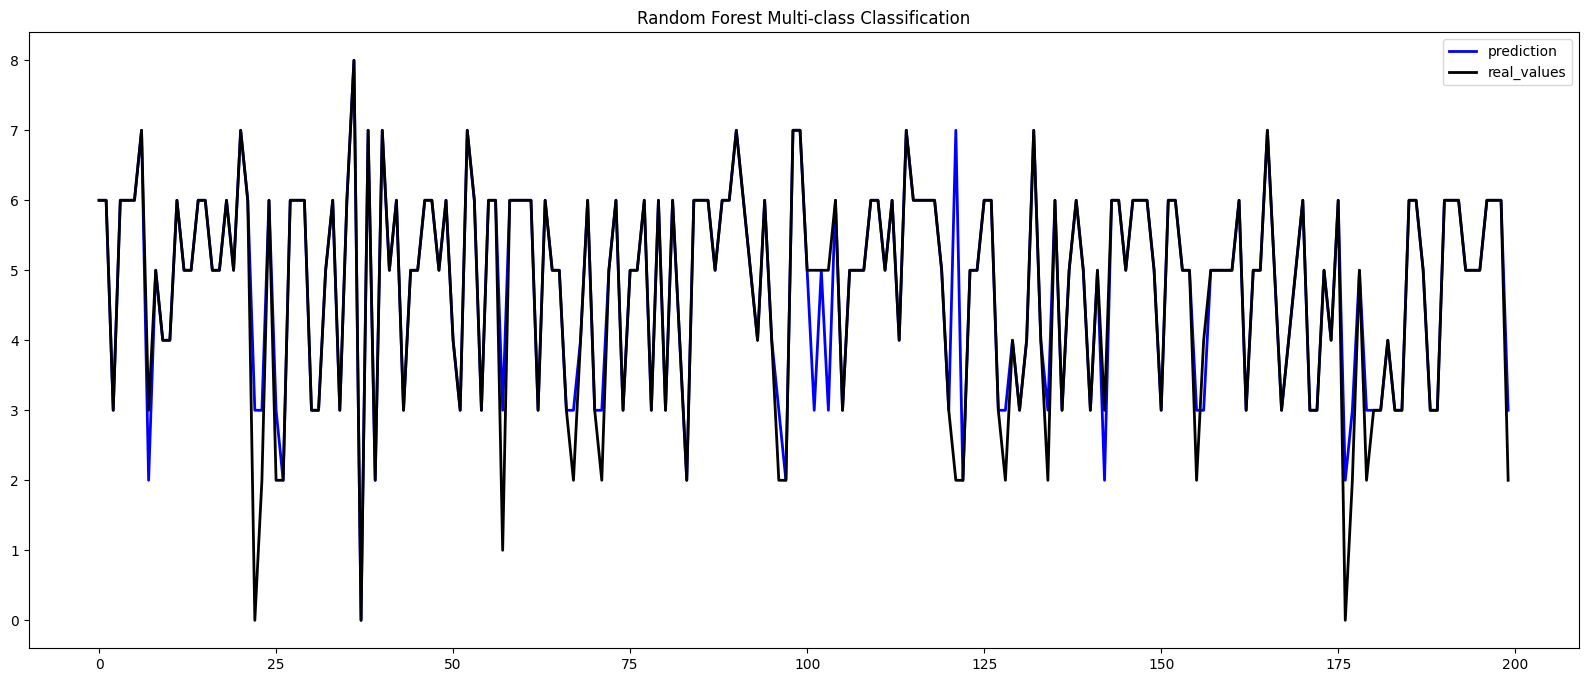

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(predictionofRF[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='black')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.show()

In [ ]:
DT = DecisionTreeClassifier(random_state=123)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
predictionofDT = DT.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, predictionofDT))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, predictionofDT))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, predictionofDT)))
print("R2 Score - " , metrics.explained_variance_score(y_test, predictionofDT)*100)
print("Accuracy - ",accuracy_score(y_test,predictionofDT)*100)

Mean Absolute Error -  0.2641079015654852
Mean Squared Error -  0.7320995751233283
Root Mean Squared Error -  0.8556281757418512
R2 Score -  70.34195742254433
Accuracy -  85.35743819327611


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=predictionofDT,target_names=report_arr)
print(cls_report)

                precision    recall  f1-score   support

      Analysis       0.68      0.23      0.34       413
      Backdoor       0.49      0.12      0.20       334
           DoS       0.28      0.26      0.27      2432
      Exploits       0.65      0.78      0.71      6843
       Fuzzers       0.96      0.87      0.91      3653
       Generic       0.99      0.98      0.99      7940
        Normal       1.00      1.00      1.00     11068
Reconnaissance       0.90      0.74      0.81      2131
     Shellcode       0.68      0.62      0.65       237
         Worms       0.43      0.67      0.52        18

      accuracy                           0.85     35069
     macro avg       0.71      0.63      0.64     35069
  weighted avg       0.86      0.85      0.85     35069



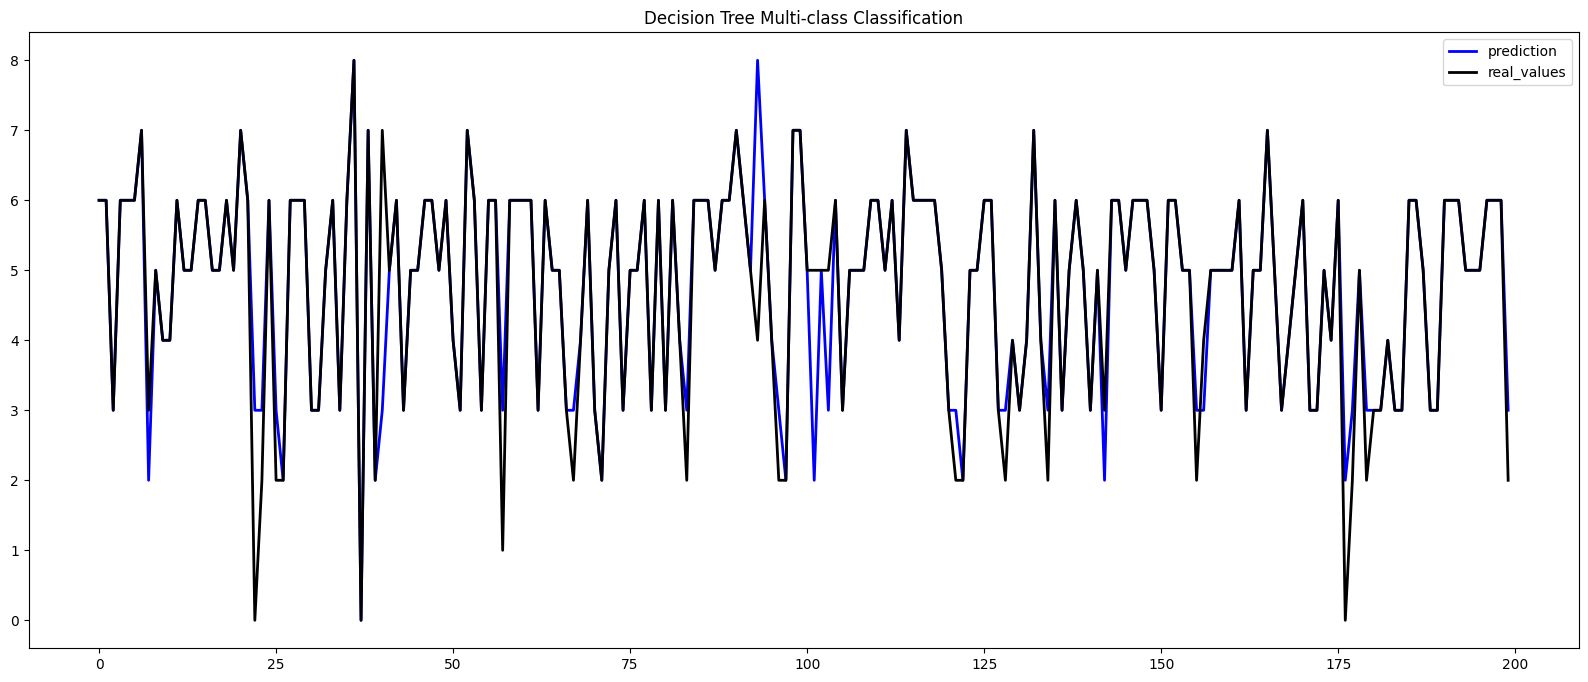

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(predictionofDT[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='black')
plt.legend(loc="best")
plt.title("Decision Tree Multi-class Classification")
plt.show()

In [ ]:
MLP = MLPClassifier(random_state=123, solver='adam', max_iter=8000)


In [ ]:
MLP.fit(X_train,y_train)

MLPClassifier(max_iter=8000, random_state=123)

In [ ]:
predictionofMLP = MLP.predict(X_test)


In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, predictionofMLP))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, predictionofMLP))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, predictionofMLP)))
print("R2 Score - " , metrics.explained_variance_score(y_test, predictionofMLP)*100)
print("Accuracy - ",accuracy_score(y_test,predictionofMLP)*100)   

Mean Absolute Error -  0.25153269269155093
Mean Squared Error -  0.6778921554649405
Root Mean Squared Error -  0.8233420646760012
R2 Score -  72.54544164266525
Accuracy -  86.18152784510536


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=predictionofMLP,target_names=report_arr)
print(cls_report)

                precision    recall  f1-score   support

      Analysis       0.73      0.20      0.32       413
      Backdoor       0.51      0.06      0.11       334
           DoS       0.33      0.10      0.16      2432
      Exploits       0.62      0.90      0.74      6843
       Fuzzers       0.91      0.88      0.89      3653
       Generic       1.00      0.98      0.99      7940
        Normal       1.00      1.00      1.00     11068
Reconnaissance       0.90      0.73      0.80      2131
     Shellcode       0.70      0.47      0.56       237
         Worms       0.45      0.28      0.34        18

      accuracy                           0.86     35069
     macro avg       0.72      0.56      0.59     35069
  weighted avg       0.85      0.86      0.84     35069



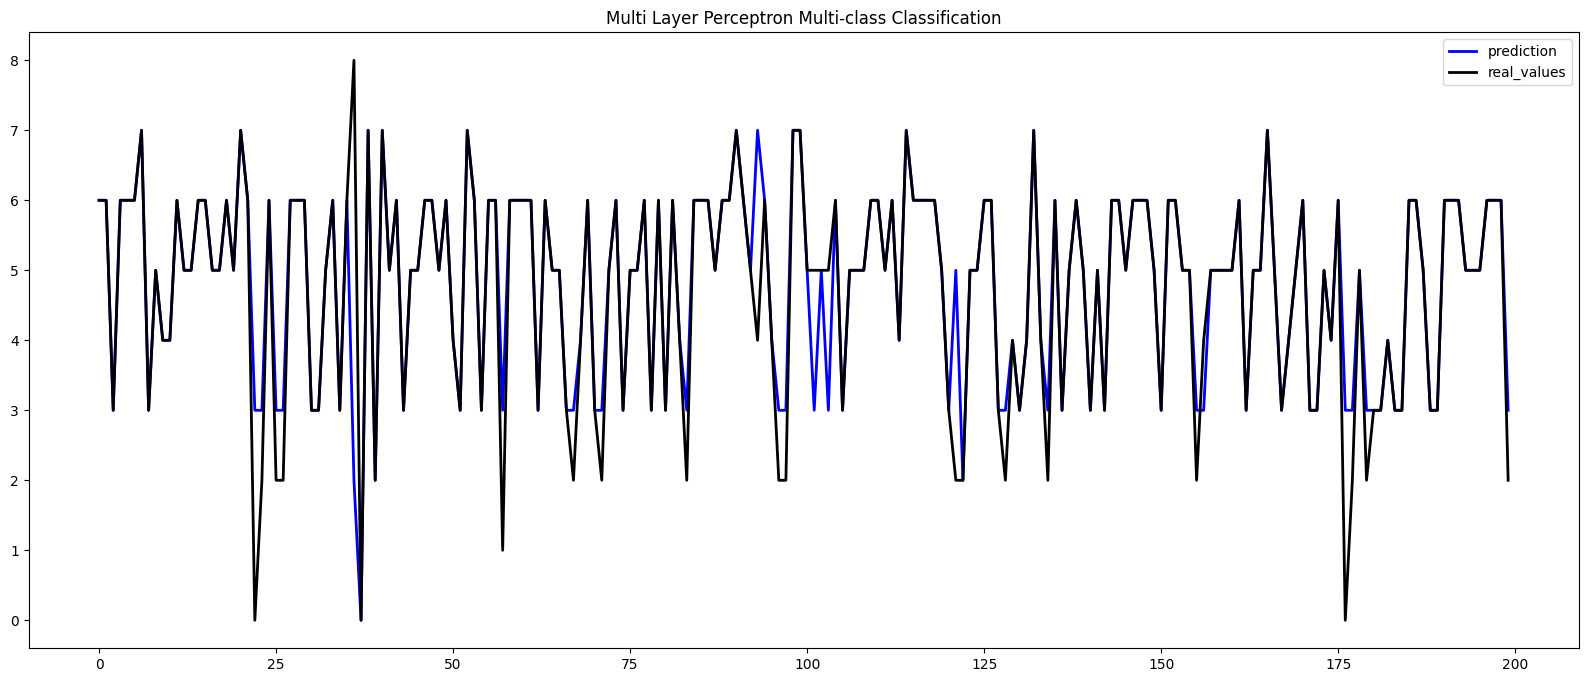

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(predictionofMLP[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='black')
plt.legend(loc="best")
plt.title("Multi Layer Perceptron Multi-class Classification")
plt.show()